c:\Users\mdoba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters from DIANA (simulated): [2 0 1 0 0 0 0 1 1 2 1 1 1 2 1 2 0 1 0 0 1 2 0 0 2 0 0 0 1 0 1 0 2 0 0 0 1
 0 0 0 2 2 1 2 1 1 0 2 2 2 1 0 0 1 2 0 1 1 0 0 1 0 2 1 1 1 1 0 1 0 2 2 1 0
 1 2 0 0 0 0 0 2 0 0 2 0 0 1 1 2 2 2 1 0 1 2 0 1 2 0 1 2 1 1 0 0 0 2 0 1 0
 2 2 0 1 1 1 0 2 2 2 2 1 2 2 0 0 1 0 1 0 2 2 0 2 1 2 0 0 0 0 0 0 0 0 1 0 1
 1 1]


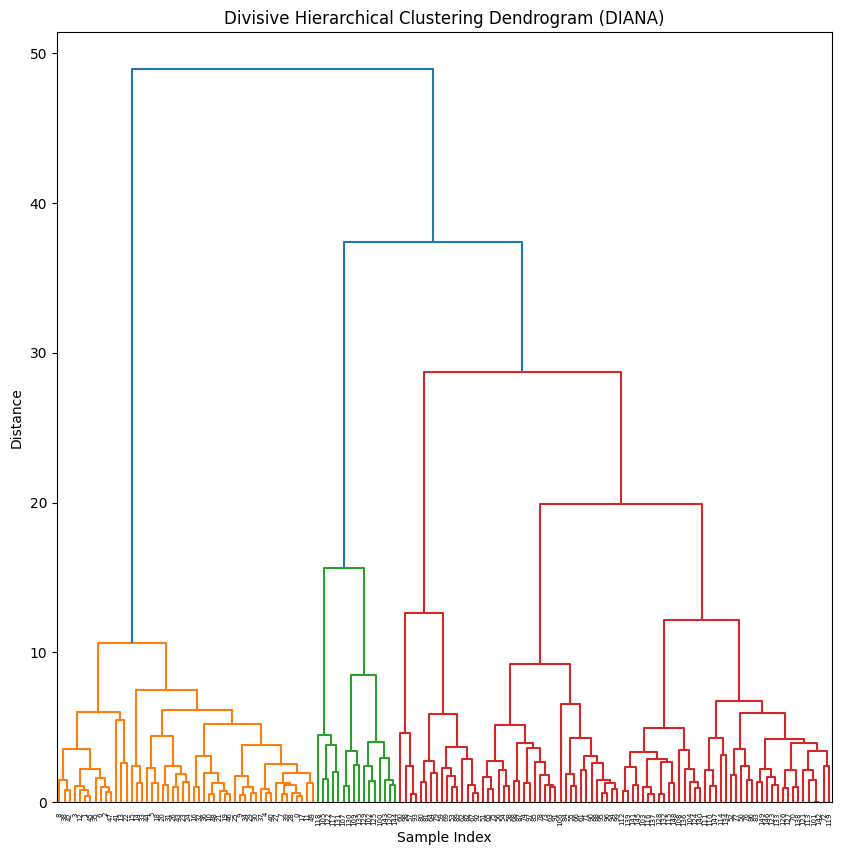

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Apply Divisive Clustering (DIANA) manually
# Calculate distance matrix
dist_matrix = squareform(pdist(X))

# Inverse distance matrix for DIANA-like splitting (farthest first)
dist_matrix = np.max(dist_matrix) - dist_matrix

# Step 3: Apply Agglomerative Clustering with inverted distances to simulate DIANA
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
clusters = model.fit_predict(dist_matrix)
print("Clusters from DIANA (simulated):", clusters)

# Step 4: Visualize the Dendrogram
Z = linkage(dist_matrix, method='complete')
plt.figure(figsize=(10, 10))
dendrogram(Z)
plt.title('Divisive Hierarchical Clustering Dendrogram (DIANA)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
